In [232]:
# Autoencoder for dimension reduction
# Reducing from high dimension data to low dimension data

In [233]:
import keras
from keras import layers

# Give size of encoded representation (usually kept low)
encoding_dim = 1

# Architecture of encoder - input, encoded & decoded layers
input_img = keras.Input(shape=(784,))
# ecodeded is encoded representation of input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# decoded is lossy reconstruction of input
decoded = layers.Dense(784, activation='sigmoid')(encoded)


In [234]:
# Autoencoder model requires input_img & decoded representation
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# Encoder model requires input_img & encoded representation
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [235]:
# Decoder Model - requires encoded_input & decoder_layer

# This is encoded 32 dimensional i/p
encoded_input = keras.Input(shape=(encoding_dim))
# Retrieve last layer of autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [236]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# This is classification problem, so loss function-binary/categorical crossentropy

In [237]:
# Load data
from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _) = mnist.load_data()

In [238]:
x_train.shape

(60000, 28, 28)

In [239]:
x_test.shape

(10000, 28, 28)

In [240]:
# RGB is 0 to 255
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert to format that can be passed to encoder
x_train = x_train.reshape(len(x_train),np.prod(x_train.shape[1:]))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [241]:
autoencoder.fit(x_train,x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.4498 - val_loss: 0.2889
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2803 - val_loss: 0.2733
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2710 - val_loss: 0.2679
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2669 - val_loss: 0.2650
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2644 - val_loss: 0.2631
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2626 - val_loss: 0.2615
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2613 - val_loss: 0.2605
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2602 - val_loss: 0.2596
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2594 - val_loss: 0.2588
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2587 - val_loss: 0.2581

In [242]:
# Encode & decode some mnist digits from test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


In [243]:
encoded_imgs.shape
# Earlier x_test (10000,784), 784 features, now entire image encoded into single feature

(10000, 1)

In [244]:
encoded_imgs

array([[19.759195],
       [12.818338],
       [17.284964],
       ...,
       [37.238297],
       [25.820982],
       [23.522045]], dtype=float32)

In [245]:
decoded_imgs.shape


(10000, 784)

In [246]:
x_test.shape
# Input x_test and decoded o/p same (10000,784)

(10000, 784)

In [247]:
# Dataset 2 for Autoencoder
# we take another dataset created with random no & having high dimension

import pandas as pd

df = pd.DataFrame(np.random.randint(0,100,size=(100,10)), columns=list('ABCDEFGHIJ'))

In [248]:
df

,A,B,C,D,E,F,G,H,I,J
0,7,35,61,33,59,0,82,42,91,83
1,41,73,10,24,99,3,94,37,36,72
2,68,12,60,45,98,14,31,42,79,11
3,53,54,67,90,41,32,58,78,75,73
4,73,55,25,64,45,81,47,51,27,59
...,...,...,...,...,...,...,...,...,...,...
95,22,73,5,13,78,83,39,93,41,89
96,43,63,35,13,76,72,13,10,10,73
97,33,60,3,91,5,34,40,17,53,36
98,85,55,52,11,96,5,38,25,67,72


In [249]:
# Divide data into train & test and change to array cz encoder
# decoder model takes array.

x_train = df[:70]
x_test = df[70:]
x_train = np.array(x_train)
x_test = np.array(x_test)

In [250]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(70, 10)
(30, 10)


In [251]:
# This is size of encoded representation
encoding_dim = 2

In [252]:
# This is i/p image - original i/p
input_img = keras.Input(shape=(10,))
# encoded is encoded representation of input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# decoded is lossy reconstruction of input
decoded = layers.Dense(10, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
# THis model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is encoded input
encoded_input = keras.Input(shape=(encoding_dim))
# Retrieve last layer of autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [253]:
# Compile model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# loss=mae cz numerical data not doing classifications

In [254]:
autoencoder.layers

In [255]:
autoencoder.fit(x_train,x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/30
1/1 [==============================] - 0s 317ms/step - loss: 0.1057 - val_loss: 0.1070
Epoch 2/30
1/1 [==============================] - 0s 19ms/step - loss: 0.1055 - val_loss: 0.1068
Epoch 3/30
1/1 [==============================] - 0s 21ms/step - loss: 0.1053 - val_loss: 0.1066
Epoch 4/30
1/1 [==============================] - 0s 20ms/step - loss: 0.1050 - val_loss: 0.1063
Epoch 5/30
1/1 [==============================] - 0s 20ms/step - loss: 0.1048 - val_loss: 0.1061
Epoch 6/30
1/1 [==============================] - 0s 22ms/step - loss: 0.1046 - val_loss: 0.1058
Epoch 7/30
1/1 [==============================] - 0s 19ms/step - loss: 0.1043 - val_loss: 0.1056
Epoch 8/30
1/1 [==============================] - 0s 20ms/step - loss: 0.1041 - val_loss: 0.1053
Epoch 9/30
1/1 [==============================] - 0s 20ms/step - loss: 0.1039 - val_loss: 0.1051
Epoch 10/30
1/1 [==============================] - 0s 19ms/step - loss: 0.1036 - val_loss: 0.1049
Epoch 11/30
1/1 [===========

In [256]:
# Predict

encoded_output = encoder.predict(x_test)
decoded_output = decoder.predict(encoded_output)

In [257]:
encoded_output

# Reduce 10 features into 2 features

array([[0.00000000e+00, 1.01378247e-01],
       [1.45520285e-01, 0.00000000e+00],
       [1.19025886e-01, 0.00000000e+00],
       [4.00316536e-01, 7.59410188e-02],
       [1.92915127e-01, 0.00000000e+00],
       [1.56247035e-01, 0.00000000e+00],
       [1.32757291e-01, 0.00000000e+00],
       [2.28838935e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [2.24780872e-01, 2.90970691e-02],
       [4.23416525e-01, 1.54413283e-05],
       [4.66322601e-01, 1.70776144e-01],
       [1.69699863e-01, 1.24023005e-01],
       [9.06121582e-02, 0.00000000e+00],
       [2.29554981e-01, 0.00000000e+00],
       [2.17585459e-01, 1.28843024e-01],
       [2.44167820e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [2.01117992e-01, 0.00000000e+00],
       [1.83853269e-01, 1.27583053e-02],
       [5.87681048e-02, 0.00000000e+00],
       [1.74434841e-01, 0.00000000e+00],
       [2.84673840e-01, 2.07646668e-01],
       [3.86228263e-01, 2.50456184e-01],
       [2.235637

In [258]:
encoded_output.shape

# 10 dimensions reduced to two dimensions

(30, 2)

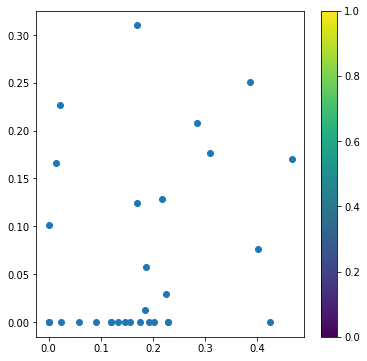

In [259]:
import matplotlib.pyplot as plt

x_test_encoded = encoder.predict(x_test, batch_size=2)
plt.figure(figsize=(6,6))
plt.scatter(x_test_encoded[:,0],x_test_encoded[:,1])
plt.colorbar()
plt.show()

# Below encoded representation tells u that data is v random there is
# no relationship b/w 2 variables/features & data was also here randomly generated

In [260]:
x_test_encoded[:,0]  # 1st encoded feature

array([0.        , 0.14552028, 0.1190259 , 0.40031654, 0.19291514,
       0.15624702, 0.13275729, 0.22883895, 0.        , 0.22478086,
       0.4234165 , 0.4663226 , 0.16969985, 0.09061216, 0.22955495,
       0.21758544, 0.02441678, 0.        , 0.201118  , 0.18385325,
       0.0587681 , 0.17443484, 0.28467387, 0.38622826, 0.02235637,
       0.3081721 , 0.01400922, 0.18636157, 0.16938849, 0.11961479],
      dtype=float32)

In [261]:
x_test_encoded[:,1]  # 2nd encoded feature

array([1.01378247e-01, 0.00000000e+00, 0.00000000e+00, 7.59410113e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.90971063e-02, 1.54487789e-05, 1.70776173e-01,
       1.24023005e-01, 0.00000000e+00, 0.00000000e+00, 1.28843024e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27583109e-02,
       0.00000000e+00, 0.00000000e+00, 2.07646668e-01, 2.50456184e-01,
       2.26397112e-01, 1.76166013e-01, 1.65884539e-01, 5.69769405e-02,
       3.09929699e-01, 0.00000000e+00], dtype=float32)

In [262]:
# To get original data back (reconstruct)

decoded_output

array([[0.48848706, 0.50134486, 0.47755793, 0.47474548, 0.49873298,
        0.48665348, 0.48817286, 0.5056744 , 0.48210436, 0.47954112],
       [0.46979654, 0.49690965, 0.46620044, 0.486589  , 0.47106102,
        0.48446453, 0.51211905, 0.49997213, 0.46813175, 0.50608313],
       [0.47393325, 0.49610797, 0.4709908 , 0.48767242, 0.4749664 ,
        0.48593292, 0.5085482 , 0.49861175, 0.4725714 , 0.5036124 ],
       [0.4273215 , 0.5112387 , 0.40964764, 0.46288243, 0.4383144 ,
        0.46597287, 0.5431271 , 0.5229077 , 0.41814733, 0.52011114],
       [0.4624072 , 0.49834377, 0.45764717, 0.48465133, 0.46408397,
        0.4818385 , 0.5185036 , 0.50240564, 0.46020287, 0.5105021 ],
       [0.46812284, 0.49723423, 0.46426266, 0.48615044, 0.46948084,
        0.48387012, 0.51356447, 0.5005229 , 0.46633568, 0.5070834 ],
       [0.47178882, 0.49652344, 0.46850735, 0.4871109 , 0.4729419 ,
        0.48517185, 0.51039904, 0.4993168 , 0.47026986, 0.50489295],
       [0.45681712, 0.4994308 , 0.4511804

In [ ]:
# Encoder-Decoder models will help u encode data & again reconstruct the data using decoder.